In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


palette = sns.color_palette(["#2176AB", "#F97662", "#FC9B31", "#FFBF00",  "#A8C43C", "#50C878", "#B284BE"])
sns.set_palette(palette)
gradient_palette = sns.blend_palette(palette, 9)

df = pd.read_csv('../../dataset/tables_clean.csv')

df.describe()

,n_columns,n_rows,n_cells,caption_len,n_references,n_footnotes
count,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,4.601684,12.843264,68.614637,136.539508,10.766839,0.518135
std,3.565155,20.679263,160.754579,172.775921,12.442481,9.815851
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,15.000000,48.000000,3.000000,0.000000
50%,4.000000,8.000000,28.000000,77.000000,8.000000,0.000000
75%,6.000000,14.000000,56.250000,168.000000,14.000000,0.000000
max,80.000000,433.000000,3031.000000,2983.000000,117.000000,369.000000


# Stats for nerds

Unique files:  358
Mean tables per file:  4.312849162011173
Max tables per file:  18
Min tables per file:  1


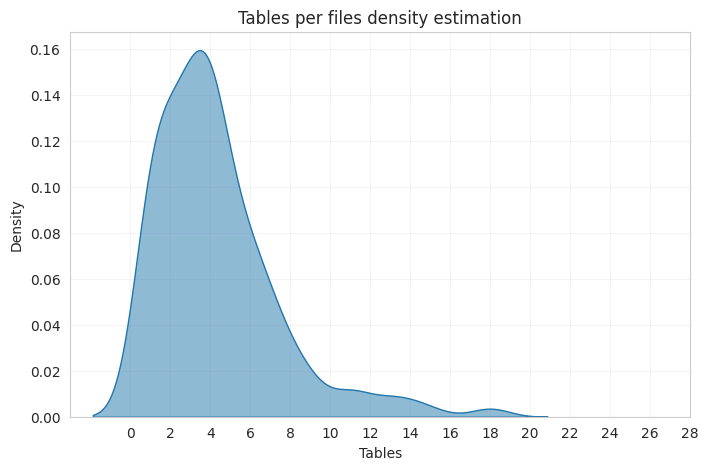

In [20]:
# plotting tables for file density estimation

fig = plt.figure(figsize=(8, 5))
df_file = df.groupby('id_file').size().reset_index(name='count')

sns.kdeplot(df_file, x='count', fill=True, color=palette[0], alpha=0.5)
plt.title('Tables per files density estimation')
# plotting mean and median and max and min and mode lines
plt.xlabel('Tables')
plt.ylabel('Density')

# white background grid
plt.grid(alpha=0.2)
plt.xticks(range(0, 30, 2))
plt.savefig('output/tables_per_file_density.png', dpi = 300)

print("Unique files: ", df['id_file'].nunique())
print("Mean tables per file: ", df_file['count'].mean())
print("Max tables per file: ", df_file['count'].max())
print("Min tables per file: ", df_file['count'].min())


In [21]:
#mean n references per table
df['n_references'] = df['references'].str.count('ref').fillna(0)
df['n_references'].mean()

print("Mean references per table: ", df['n_references'].mean())
print("Max references per table: ", df['n_references'].max())
print("Min references per table: ", df['n_references'].min())


Mean references per table:  0.6884715025906736
Max references per table:  44
Min references per table:  0


<Figure size 800x800 with 0 Axes>

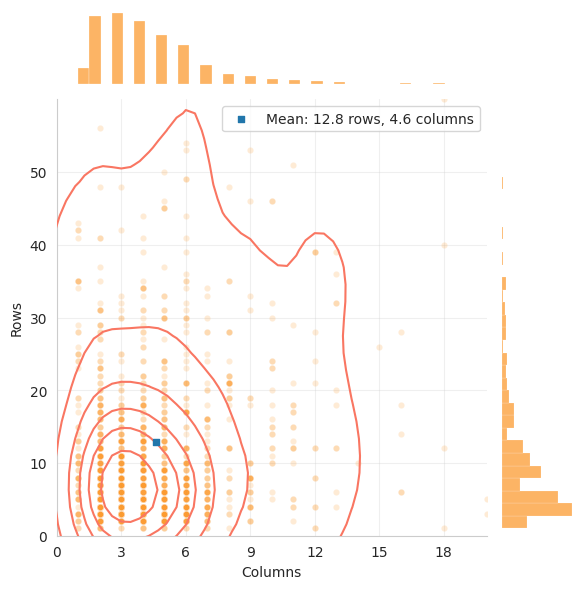

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(8, 8))

# hexbin plot
plot = sns.jointplot(data=df,
                     x='n_columns',
                     y='n_rows',
                     s=20,
                     kind='scatter',
                     color=palette[2],
                     alpha = 0.2)
plot.plot_joint(sns.kdeplot, color=palette[1], zorder=10, levels=7)

plt.xlim(0, 20)
plt.ylim(0, 60)

plt.xticks(range(0, 20, 3))
plt.yticks(range(0, 60, 10))

# Set labels and legend after creating the plot
plot.set_axis_labels(xlabel='Columns', ylabel='Rows')
plot.ax_marg_x.grid(False)
plot.ax_marg_y.grid(False)

#removing margin axis
plot.ax_marg_x.axis('off')
plot.ax_marg_y.axis('off')

# kde plot smoothing

# Set the title after creating the plot
#grid opacity
plot.ax_joint.grid(alpha=0.5)
#sub grid
plot.ax_joint.minorticks_on()
#plotting mean lines
#darken the mean color
plt.grid(alpha=0.3)

plt.scatter(df['n_columns'].mean(), df['n_rows'].mean(), s=20,
            label=f"Mean: {df['n_rows'].mean():.1f} rows, {df['n_columns'].mean():.1f} columns",
            zorder=50, color=palette[0], marker='s')
plt.legend(loc='upper right')
plt.savefig('output/rows_columns.png', dpi = 300)

In [23]:
# Remove outliers
df = df[(df['n_columns'] > df['n_columns'].quantile(0.01)) & (df['n_columns'] < df['n_columns'].quantile(0.99))]
df = df[(df['n_rows'] > df['n_rows'].quantile(0.01)) & (df['n_rows'] < df['n_rows'].quantile(0.99))]
df = df[(df['n_cells'] > df['n_cells'].quantile(0.01)) & (df['n_cells'] < df['n_cells'].quantile(0.99))]
df = df[(df['caption_len'] > df['caption_len'].quantile(0.01)) & (df['caption_len'] < df['caption_len'].quantile(0.99))]
df = df[(df['n_references'] > df['n_references'].quantile(0.01)) & (df['n_references'] < df['n_references'].quantile(0.99))]

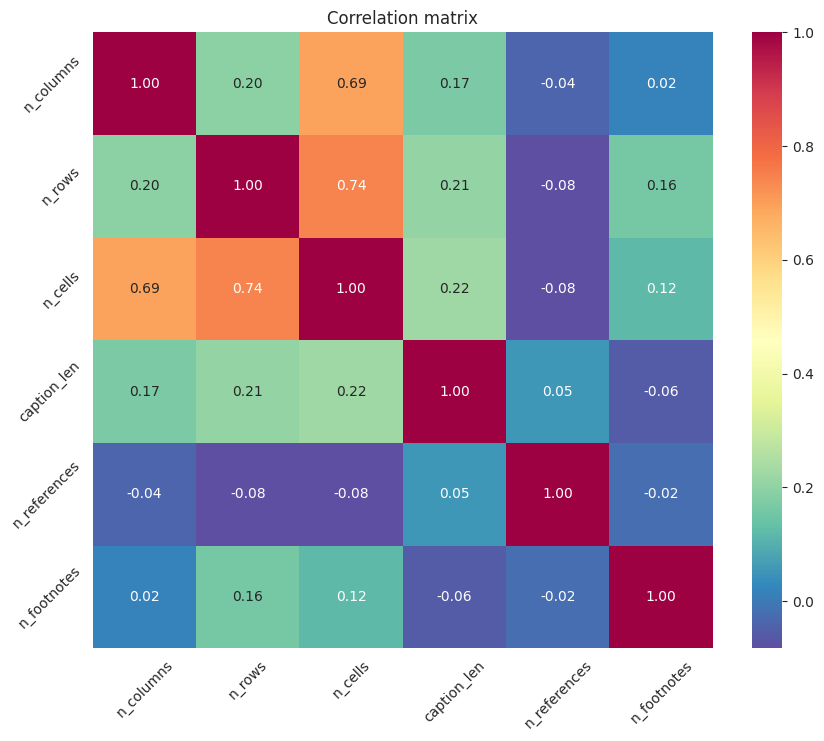

In [24]:

# correlation matrix
fig = plt.figure(figsize=(10, 8))
corr = df[['n_columns', 'n_rows', 'n_cells', 'caption_len','n_references', 'n_footnotes']].corr()
sns.heatmap(corr, annot=True, cmap='Spectral_r', fmt=".2f")
plt.title('Correlation matrix')
#45 deg
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.savefig('output/correlation_matrix.png', dpi = 300)